**Theory Questions**

1. What is unsupervised learning in the context of machine learning?
- Unsupervised learning involves training a model on data without labeled outcomes. The goal is to find hidden patterns or groupings, such as clusters or associations, in the dataset.

2. How does K-Means clustering algorithm work?
- K-Means partitions data into k clusters by minimizing the distance between data points and their assigned cluster centroids. It iteratively updates centroids until convergence.

3. Explain the concept of a dendrogram in hierarchical clustering.
- A dendrogram is a tree-like diagram that shows the merging or splitting of clusters at each step in hierarchical clustering, helping visualize the hierarchy and choose the optimal number of clusters.

4. What is the main difference between K-Means and Hierarchical Clustering?
- K-Means is a partitional method requiring the number of clusters in advance, while hierarchical clustering builds a tree of clusters and doesn’t need a preset number of clusters.

5. What are the advantages of DBSCAN over K-Means?
- DBSCAN can find arbitrarily shaped clusters and is robust to outliers, unlike K-Means, which assumes spherical clusters and is sensitive to noise.

6. When would you use Silhouette Score in clustering?
- Silhouette Score is used to evaluate the quality of clustering by measuring how similar a point is to its own cluster compared to other clusters. It helps in determining the optimal number of clusters.

7. What are the limitations of Hierarchical Clustering?
- It is computationally expensive, doesn’t scale well to large datasets, and once a merge/split is done, it cannot be undone, which may lead to suboptimal clustering.

8. Why is feature scaling important in clustering algorithms like K-Means?
- K-Means uses distance measures like Euclidean distance, so features with larger scales can dominate. Scaling ensures all features contribute equally to clustering.

9. How does DBSCAN identify noise points?
- DBSCAN marks points as noise if they are not within the eps radius of enough (min_samples) other points. These noise points don’t belong to any cluster.

10. Define inertia in the context of K-Means.
- Inertia is the sum of squared distances between each point and its assigned cluster centroid. Lower inertia indicates more compact clusters.

11. What is the elbow method in K-Means clustering?
- The elbow method plots inertia against the number of clusters and identifies the "elbow" point where the rate of decrease sharply drops, suggesting the optimal number of clusters.

12. Describe the concept of "density" in DBSCAN.
- Density in DBSCAN refers to the number of points within a given radius (eps). High-density areas form clusters, while low-density areas are treated as noise.

13. Can hierarchical clustering be used on categorical data?
- Yes, but it requires a suitable distance metric like Hamming or Gower distance, as Euclidean distance is not appropriate for categorical features.

14. What does a negative Silhouette Score indicate?
- A negative Silhouette Score means a sample is closer to another cluster than its own, indicating poor clustering or misclassification.

15. Explain the term "linkage criteria" in hierarchical clustering.
- Linkage criteria define how the distance between clusters is calculated—common methods include single, complete, average, and Ward’s linkage.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
- K-Means assumes equal-sized, spherical clusters, so it struggles with irregular shapes, varying densities, or imbalanced cluster sizes.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
- The key parameters are eps (radius) and min_samples (minimum neighbors to form a core point). These control cluster density and influence which points are core, border, or noise.

18. How does K-Means++ improve upon standard K-Means initialization?
- K-Means++ selects initial centroids more strategically, spreading them out to reduce the chances of poor convergence and improve clustering performance.

19. What is agglomerative clustering?
- Agglomerative clustering is a bottom-up hierarchical method where each data point starts as its own cluster and pairs are merged step by step based on similarity.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
- Unlike inertia, which only measures compactness, Silhouette Score considers both cohesion and separation, giving a more comprehensive evaluation of clustering quality.



**Practical Questions**

21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot.

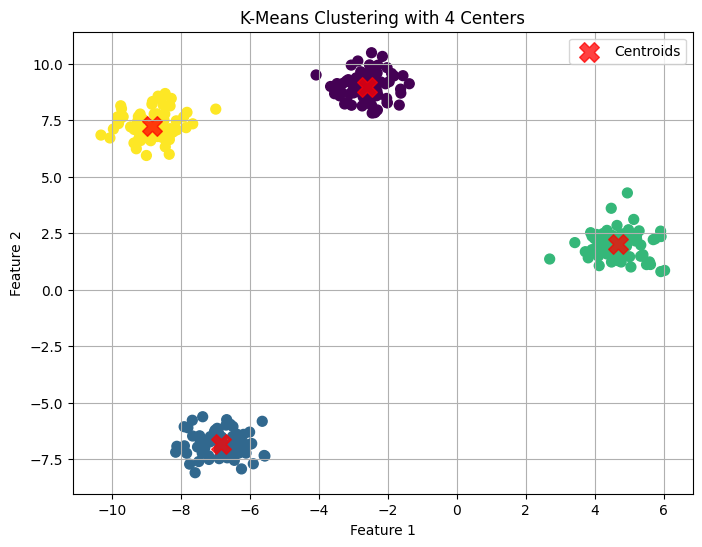

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels.

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Using all 4 features

# Step 2: Apply Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

# Step 3: Display the first 10 predicted labels
print("First 10 predicted cluster labels:", labels[:10])


First 10 predicted cluster labels: [1 1 1 1 1 1 1 1 1 1]


23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

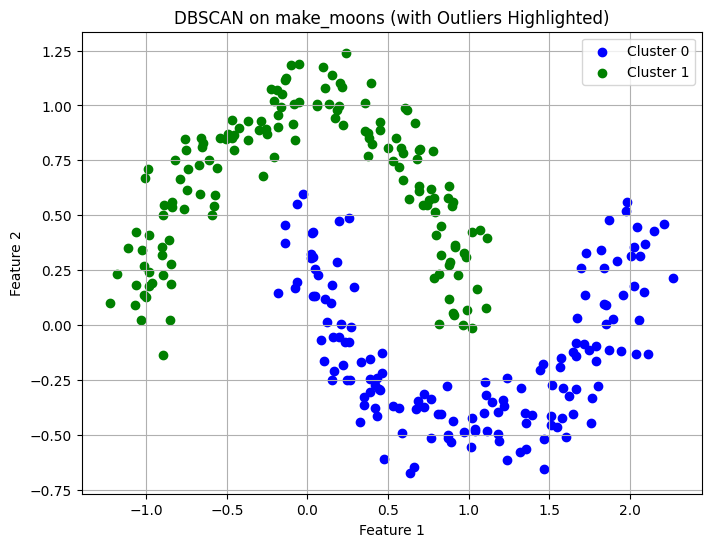

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Visualize clusters and highlight outliers
plt.figure(figsize=(8, 6))

# Plot clustered points
unique_labels = set(labels)
colors = ['blue', 'green', 'orange', 'purple', 'cyan']
for label in unique_labels:
    if label == -1:
        # Outliers
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='red', marker='x', label='Outliers')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c=colors[label % len(colors)], label=f'Cluster {label}')

plt.title("DBSCAN on make_moons (with Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster.

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, size in zip(unique, counts):
    print(f"Cluster {cluster_id}: {size} samples")


Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

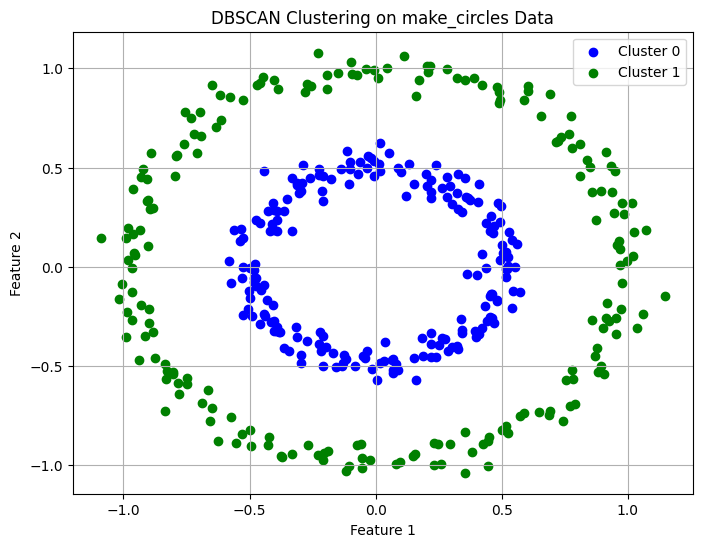

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic circular data
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

colors = ['blue', 'green', 'orange', 'purple']
for label in unique_labels:
    if label == -1:
        # Noise
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='red', marker='x', label='Outliers')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c=colors[label % len(colors)], label=f'Cluster {label}')

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Output the cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
print("Cluster Centroids:\n")
print(centroids)



Cluster Centroids:

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0  

27.  Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN.

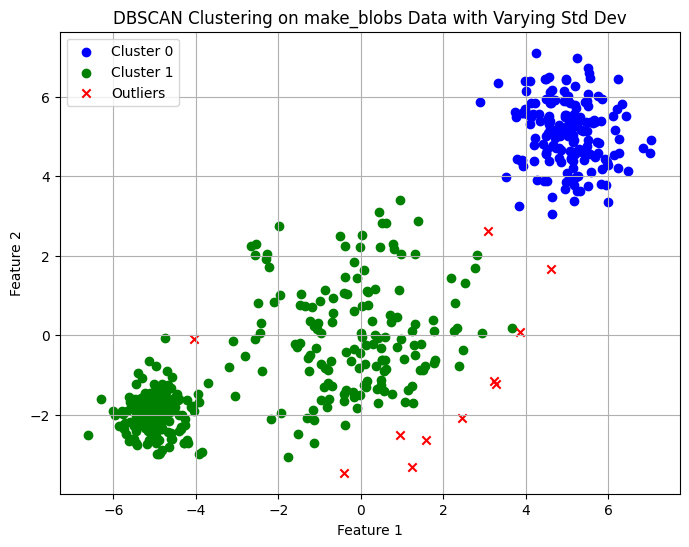

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Generate synthetic data with varying cluster std deviations
X, _ = make_blobs(n_samples=500,
                  centers=[(-5, -2), (0, 0), (5, 5)],
                  cluster_std=[0.5, 1.5, 0.8],
                  random_state=42)

# Step 2: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = ['blue', 'green', 'orange', 'purple', 'brown']

for label in unique_labels:
    if label == -1:
        # Noise
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='red', marker='x', label='Outliers')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1],
                    c=colors[label % len(colors)], label=f'Cluster {label}')

plt.title("DBSCAN Clustering on make_blobs Data with Varying Std Dev")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


28.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

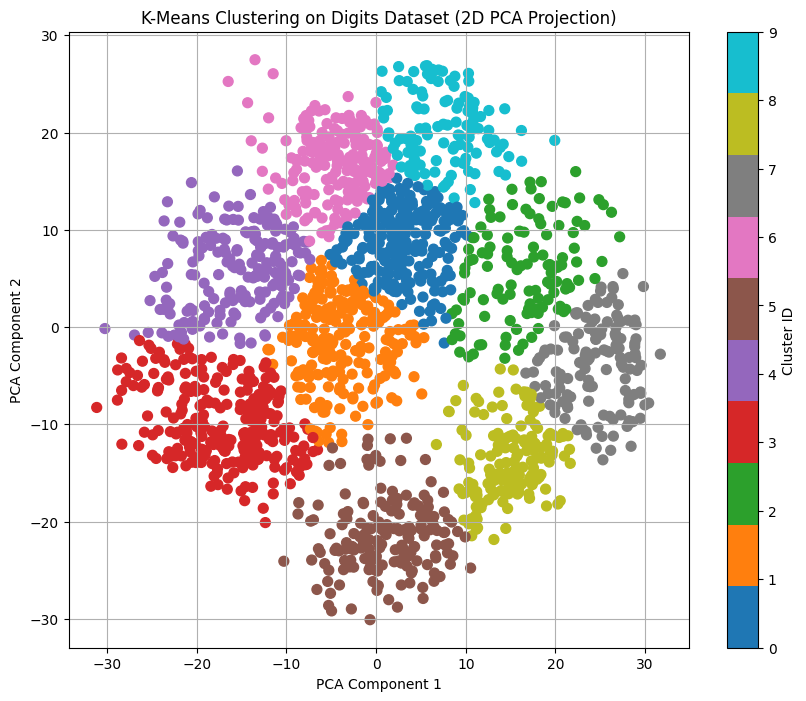

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # actual digit labels (not used in clustering)

# Step 2: Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering (assuming 10 clusters for 10 digits)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K-Means Clustering on Digits Dataset (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()


29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

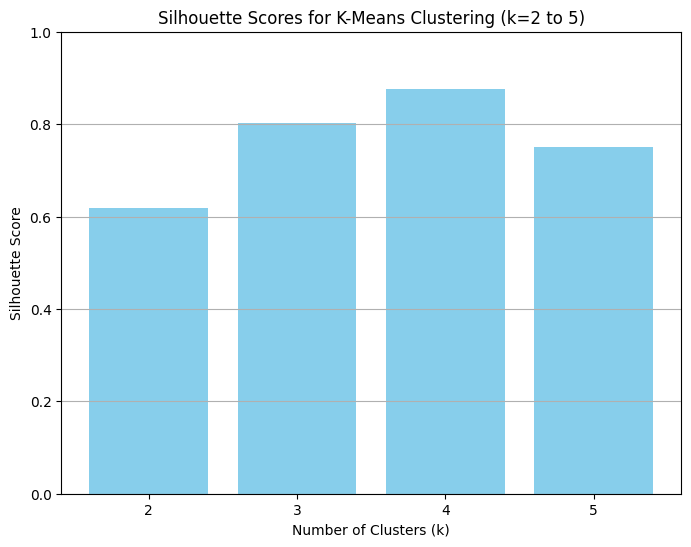

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Evaluate silhouette scores for k = 2 to 5
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 3: Plot silhouette scores as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.title("Silhouette Scores for K-Means Clustering (k=2 to 5)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

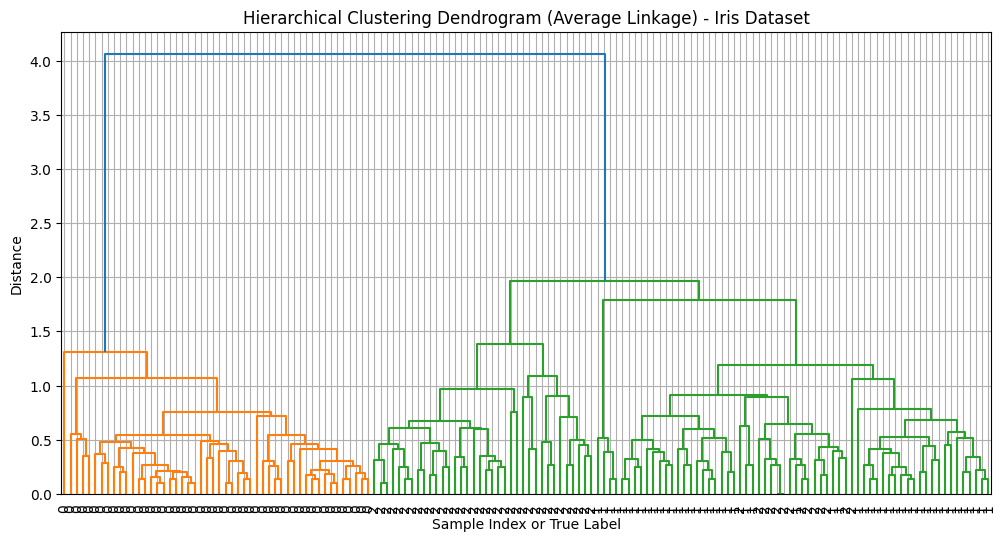

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Step 2: Compute linkage matrix using average linkage
linked = linkage(X, method='average')

# Step 3: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=iris.target,
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0.7 * max(linked[:, 2]))  # optional threshold line
plt.title("Hierarchical Clustering Dendrogram (Average Linkage) - Iris Dataset")
plt.xlabel("Sample Index or True Label")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries.

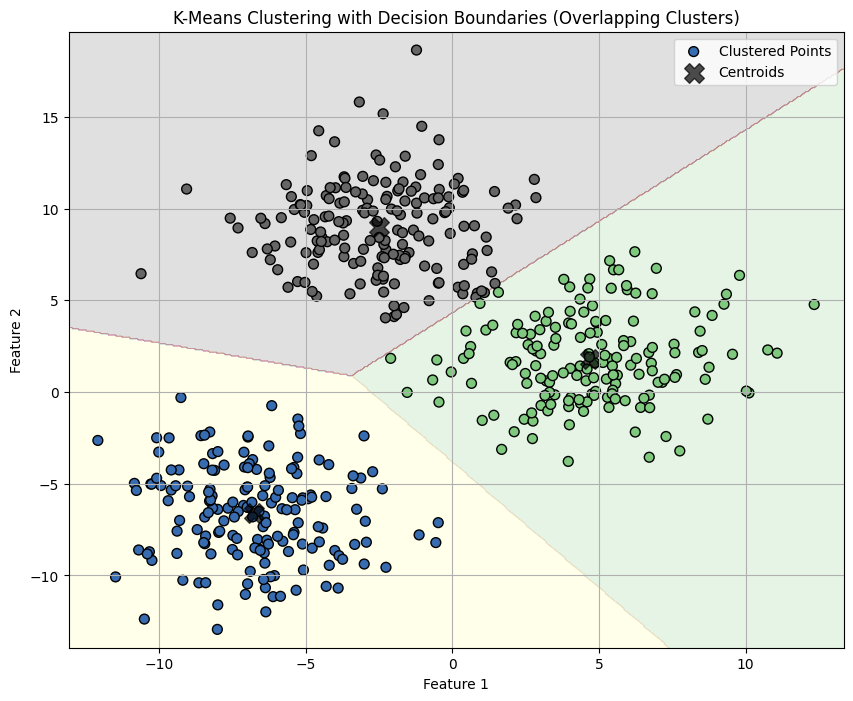

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)  # High std for overlap

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Step 3: Plot clusters and decision boundaries
plt.figure(figsize=(10, 8))

# Create a mesh grid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict cluster for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.2, cmap='Accent')

# Plot actual points
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='Accent', edgecolor='k', label='Clustered Points')

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, marker='X', label='Centroids')

plt.title("K-Means Clustering with Decision Boundaries (Overlapping Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


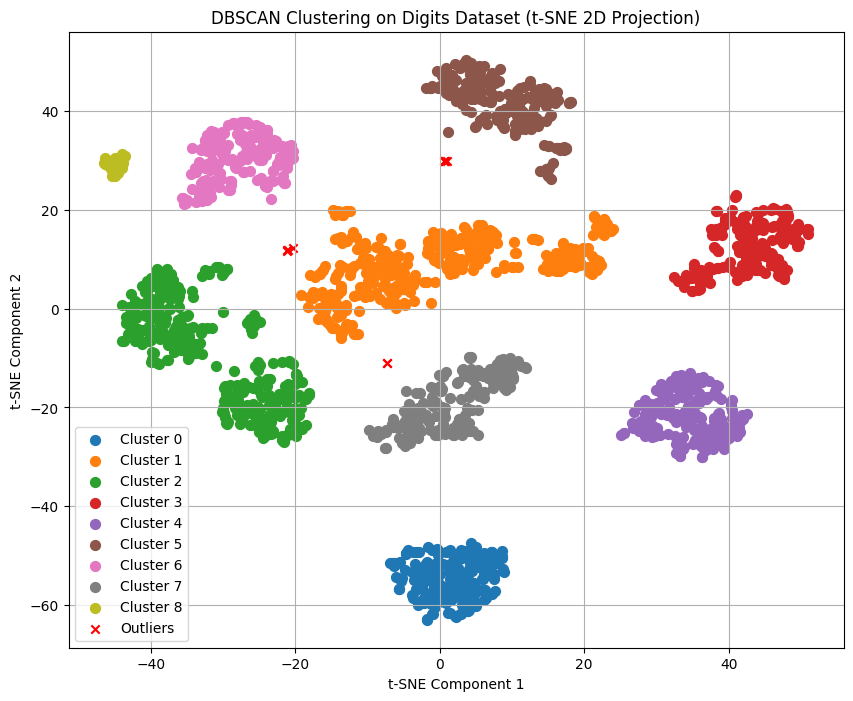

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Visualize the results
plt.figure(figsize=(10, 8))
unique_labels = set(labels)
colors = plt.cm.tab10.colors

for label in unique_labels:
    if label == -1:
        # Outliers
        plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1],
                    c='red', marker='x', label='Outliers')
    else:
        plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1],
                    color=colors[label % len(colors)], label=f'Cluster {label}', s=50)

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE 2D Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result.

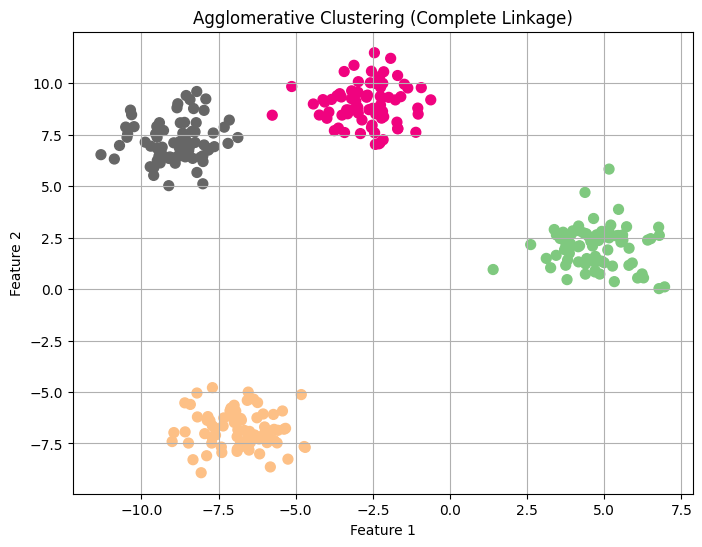

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

# Step 3: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot.

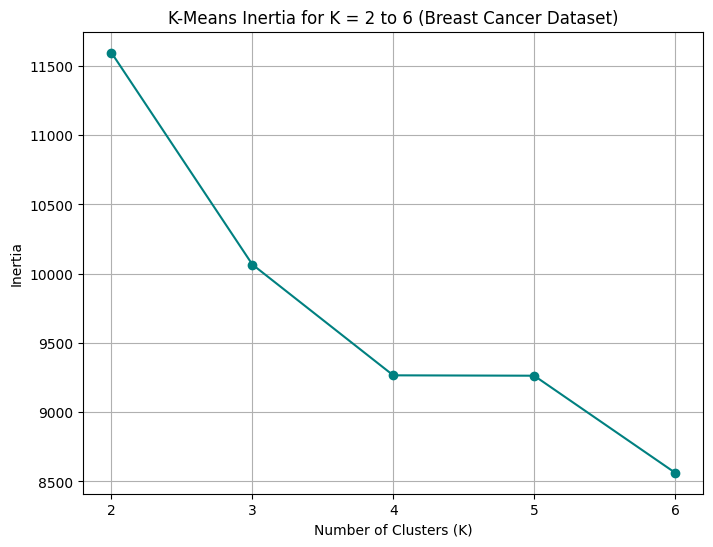

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means for K = 2 to 6 and store inertia
k_values = range(2, 7)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Step 4: Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='teal')
plt.title("K-Means Inertia for K = 2 to 6 (Breast Cancer Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(k_values)
plt.show()


35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage.

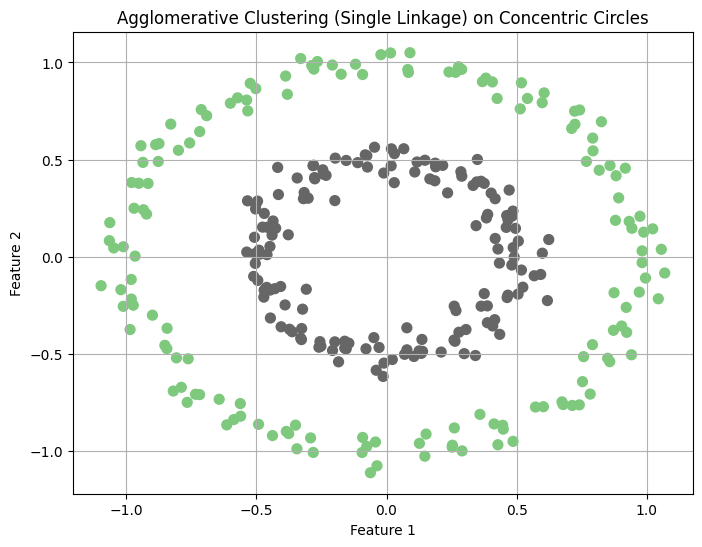

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic concentric circles
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply Agglomerative Clustering with single linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

# Step 3: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


36.  Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise).

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count the number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters (excluding noise): 0
Number of noise points: 178


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points.

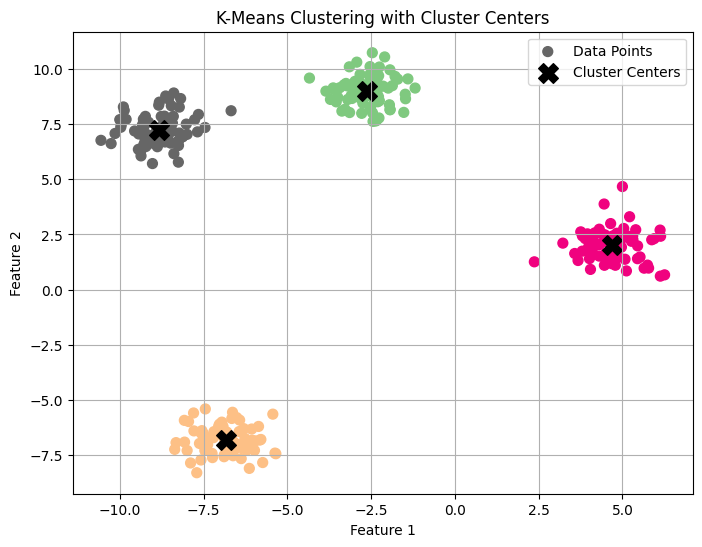

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='Accent', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')

plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Standardize the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count and print number of noise samples
n_noise = np.sum(labels == -1)
print(f"Number of noise samples: {n_noise}")


Number of noise samples: 26


39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result.

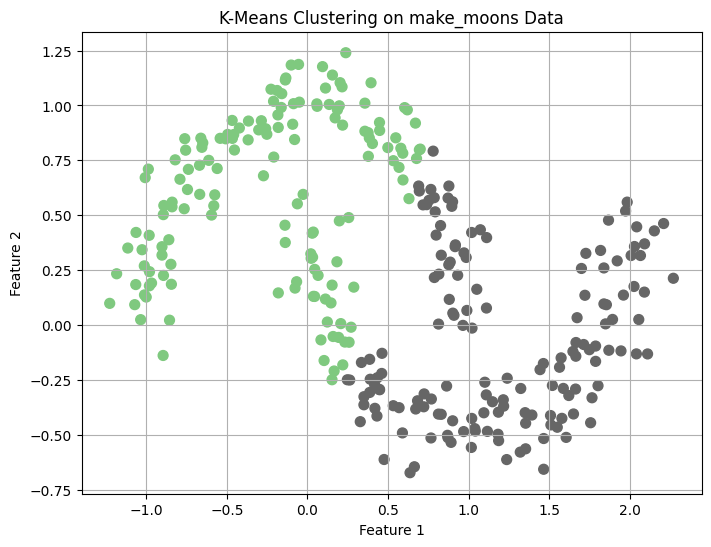

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Step 1: Generate synthetic moon-shaped data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("K-Means Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.

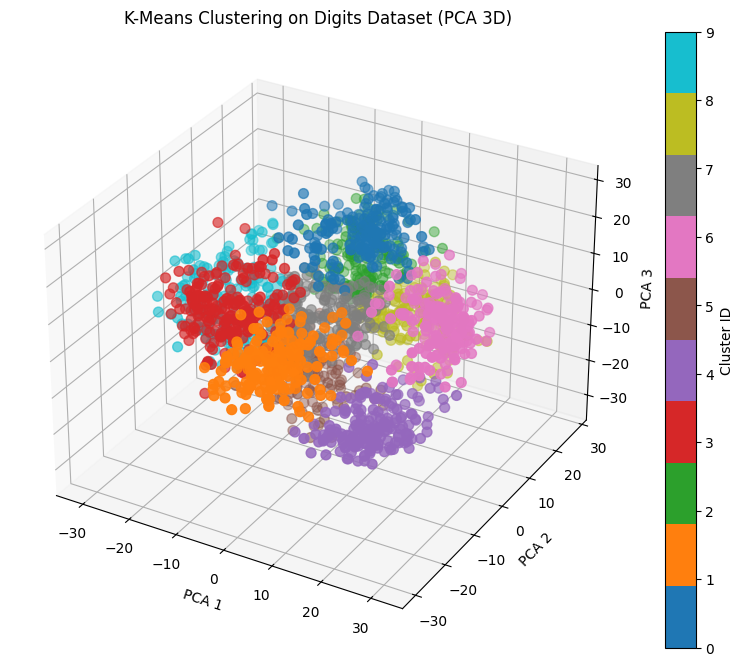

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce to 3 components using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 4: 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=50)

ax.set_title("K-Means Clustering on Digits Dataset (PCA 3D)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter, label='Cluster ID')
plt.show()



41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering.

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data with 5 centers
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Evaluate with Silhouette Score
score = silhouette_score(X, labels)
print(f"Silhouette Score for 5 Clusters: {score:.4f}")


Silhouette Score for 5 Clusters: 0.7657


42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D.

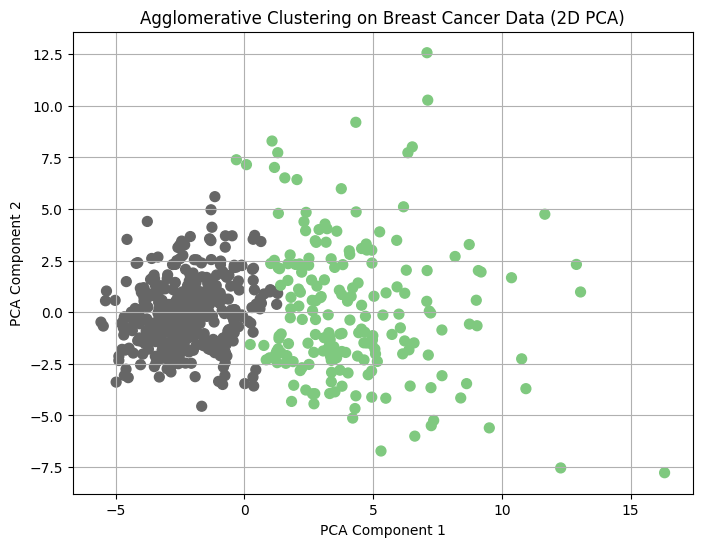

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Step 5: Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Accent', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Data (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()



43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side.

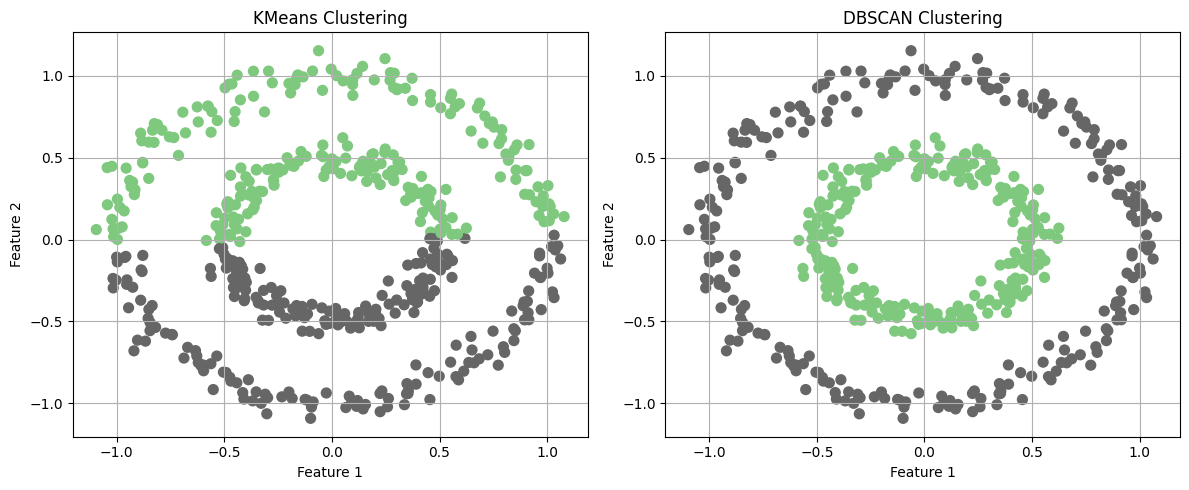

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Step 1: Generate noisy circular data
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 4: Visualize side-by-side
plt.figure(figsize=(12, 5))

# KMeans plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Accent', s=50)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# DBSCAN plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Accent', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()


44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

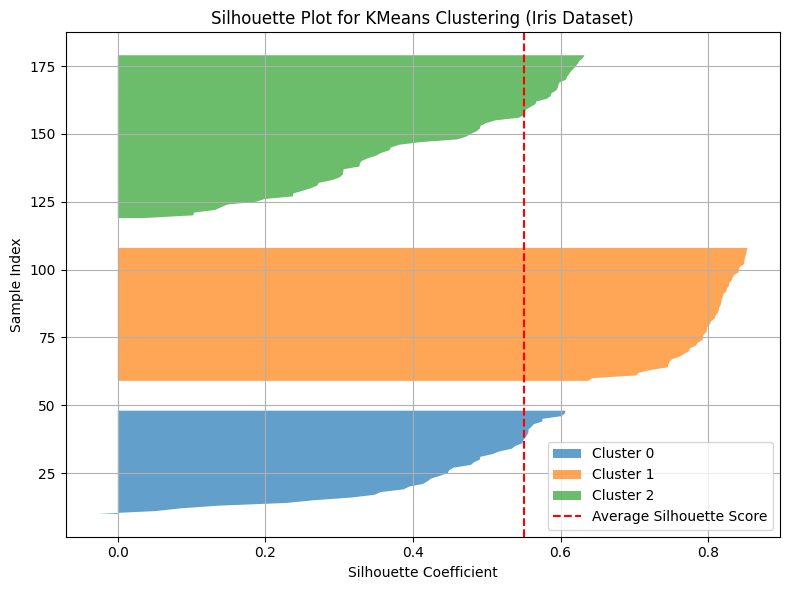

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Apply KMeans clustering (3 clusters for Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X, labels)

# Step 4: Plot silhouette scores
plt.figure(figsize=(8, 6))
y_lower = 10
for i in np.unique(labels):
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')
    y_lower = y_upper + 10  # space between clusters

plt.axvline(x=silhouette_score(X, labels), color="red", linestyle="--", label="Average Silhouette Score")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Sample Index")
plt.title("Silhouette Plot for KMeans Clustering (Iris Dataset)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters.

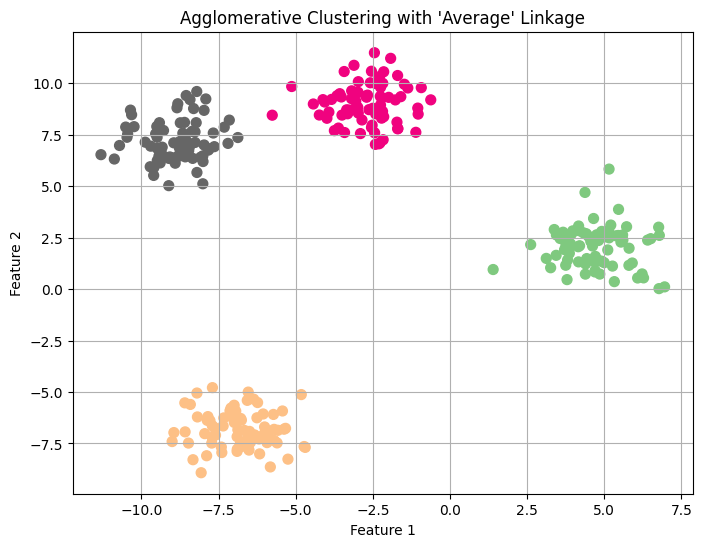

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'average' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50)
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features).

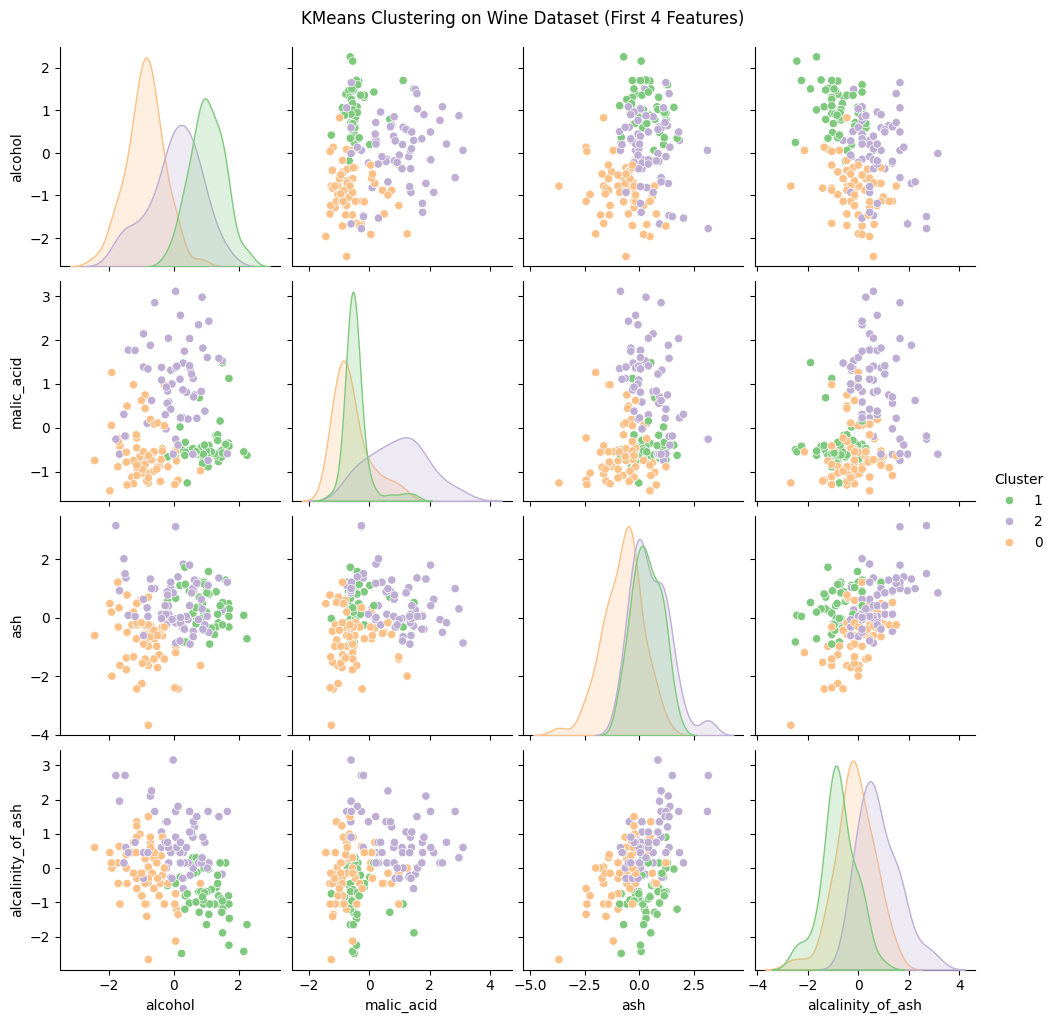

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data[:, :4]  # Use first 4 features
feature_names = wine.feature_names[:4]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Create DataFrame for pairplot
df = pd.DataFrame(X_scaled, columns=feature_names)
df['Cluster'] = labels.astype(str)

# Step 5: Visualize using seaborn pairplot
sns.pairplot(df, hue='Cluster', palette='Accent', diag_kind='kde')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count.

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Generate noisy blob data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Count clusters and noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 4
Number of noise points: 13


48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


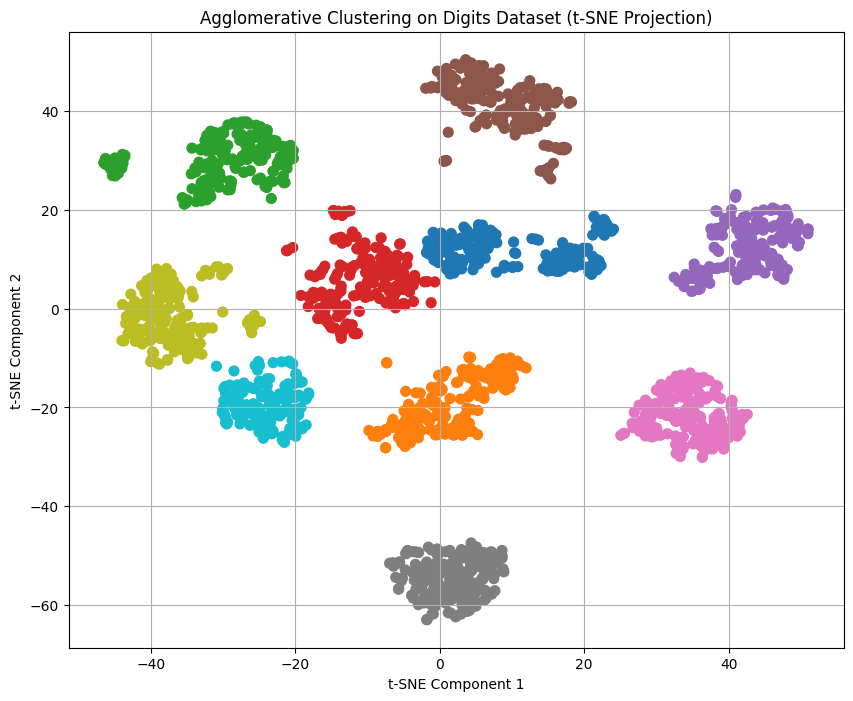

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agglo.fit_predict(X_tsne)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()
